# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from datetime import datetime as dt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rakamin/Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.shape

(2240, 30)

In [ ]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

##Feature Engineering

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
#Create new features: Age, Total_Spent, Total_Purchases, Total_Cmpresponses, Conversion_Rate
#Age
current_year = dt.now().year
df['Age']= current_year - df['Year_Birth']

#Total_Spent & Total_Purchases
df['Total_Spent']=df[['MntCoke','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
df['Total_Purchases']=df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

#Total_Cmpresponses
df['Total_Cmpresponses']=df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)

#Conversion_Rate
def rate(x, y):
    if y == 0:
        return 0
    return round(x / y,2)

df['Conversion_Rate'] = df.apply(lambda x: rate(x['Response'], x['NumWebVisitsMonth']), axis=1)
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Total_Purchases,Total_Cmpresponses,Conversion_Rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,3,11,1,66,1617000,25,0,0.14
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,3,11,0,69,27000,6,0,0.00
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,3,11,0,58,776000,21,0,0.00
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,3,11,0,39,53000,8,0,0.00
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,3,11,0,42,422000,19,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,3,11,0,56,1341000,18,0,0.00
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,0,3,11,0,77,444000,22,1,0.00
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,3,11,0,42,1241000,19,1,0.00
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,3,11,0,67,843000,23,0,0.00


In [ ]:
#Age Grouping
def age(x):
  if x <= 12:
    return 'Child'
  elif x <= 19:
    return 'Teenager'
  elif x <= 39:
    return 'Adult'
  elif x <= 59:
     return 'Middle-Aged Adult'
  else:
     return 'Senior Adult'

df['Age_category']=df['Age'].apply(age)
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Total_Purchases,Total_Cmpresponses,Conversion_Rate,Age_category
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,3,11,1,66,1617000,25,0,0.14,Senior Adult
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,3,11,0,69,27000,6,0,0.00,Senior Adult
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,3,11,0,58,776000,21,0,0.00,Middle-Aged Adult
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,3,11,0,39,53000,8,0,0.00,Adult
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,3,11,0,42,422000,19,0,0.00,Middle-Aged Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,3,11,0,56,1341000,18,0,0.00,Middle-Aged Adult
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,3,11,0,77,444000,22,1,0.00,Senior Adult
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,3,11,0,42,1241000,19,1,0.00,Middle-Aged Adult
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,3,11,0,67,843000,23,0,0.00,Senior Adult


##EDA

In [ ]:
nums=df.select_dtypes(exclude=['object']).columns.tolist()
cats=df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


In [ ]:
df[cats].describe().T

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Dt_Customer,2240,663,31-08-2012,12
Age_category,2240,3,Middle-Aged Adult,1237


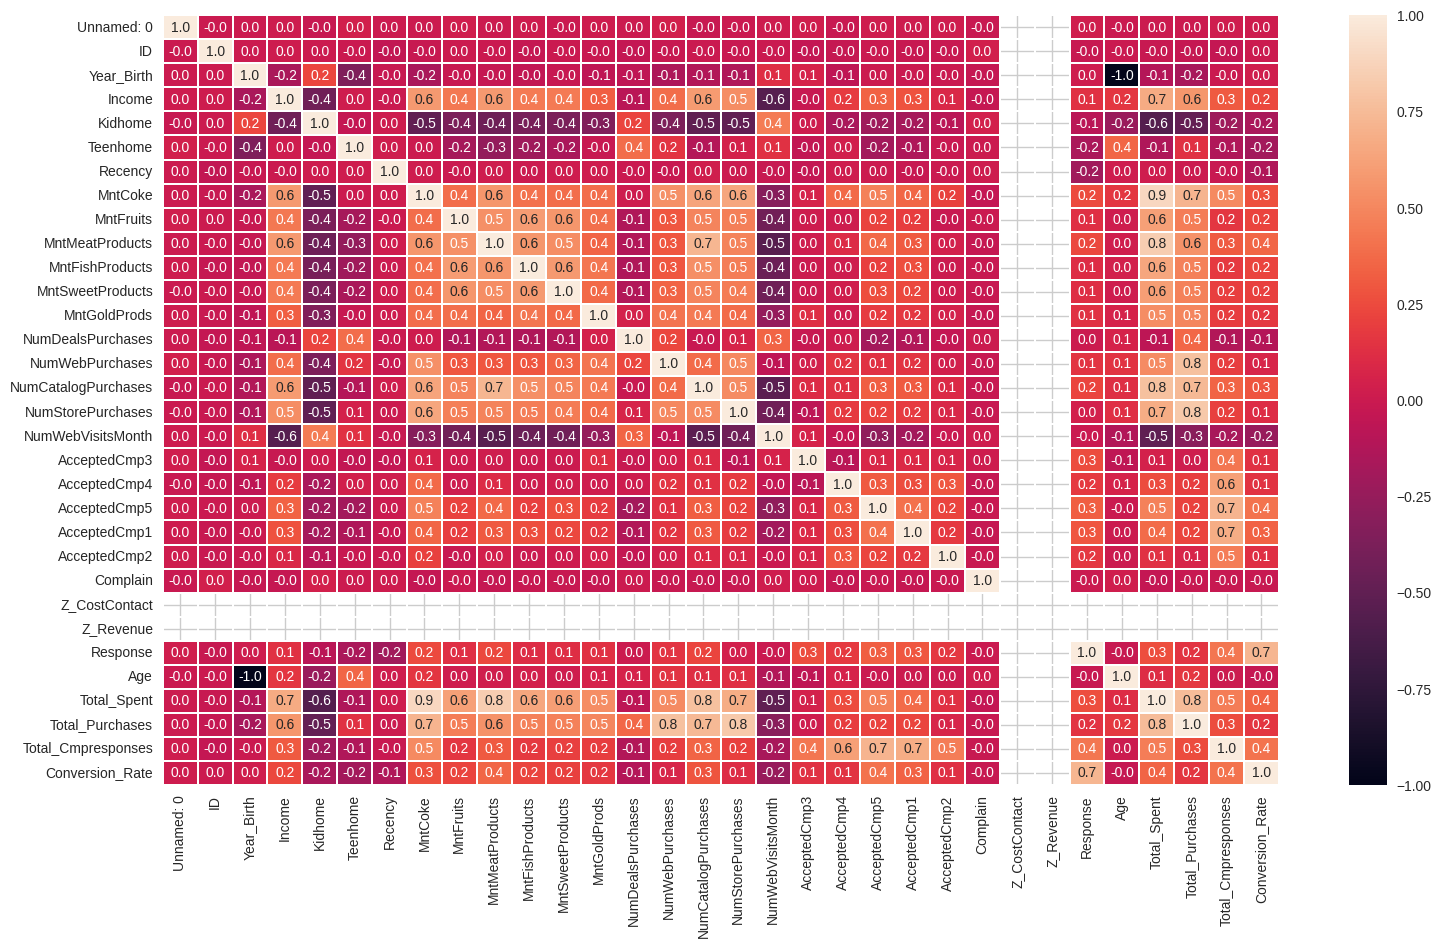

In [ ]:
#Correlation
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True, fmt='.1f',linewidth=0.1,annot_kws={"fontsize":10})
plt.show()

- Conversion_Rate has a strong correlation with the features Income, Total_Spent, and Total_Purchases.
- On the other hand, Age has a weak correlation with Conversion_Rate.
- Additionally, Income has a strong correlation with both Total_Spent and Total_Purchases.


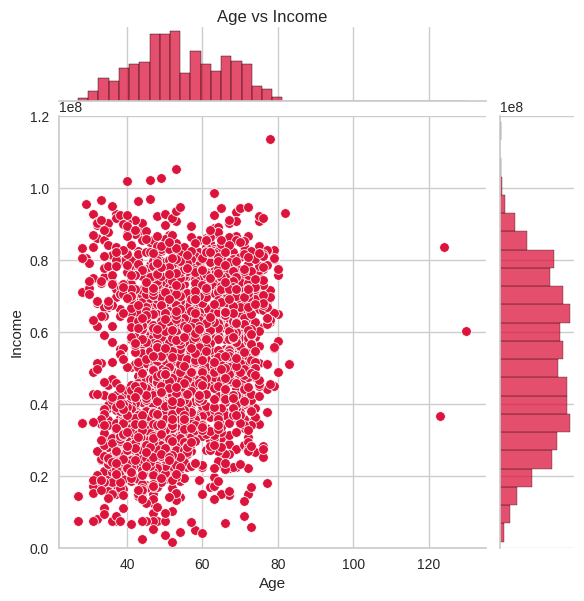

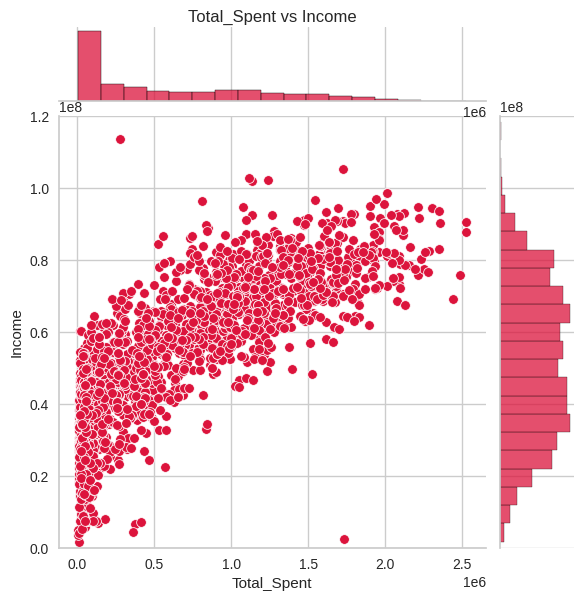

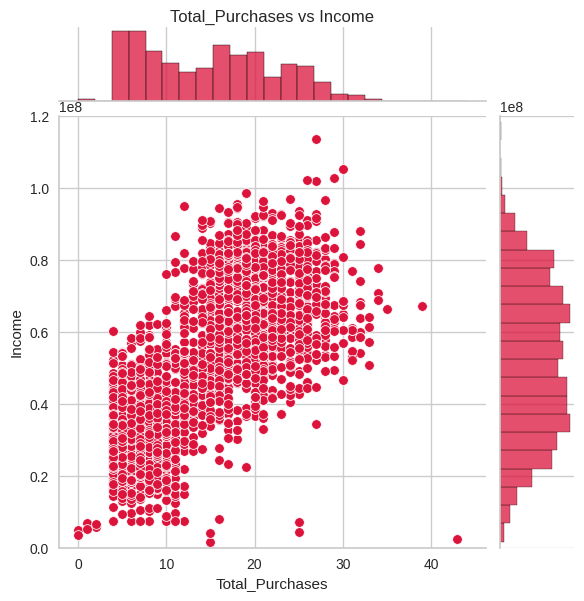

In [ ]:
#Income vs Age, Total_Spent, Total_Purchases
def plot_jointplot(x, y, data):
    sns.jointplot(x=x, y=y, data=data, color='crimson')
    plt.title(f'{x} vs {y}',y=1.2, fontsize=12)
    plt.ylim(0, 120000000)
    plt.show()

plot_jointplot('Age', 'Income', df)
plot_jointplot('Total_Spent', 'Income', df)
plot_jointplot('Total_Purchases', 'Income', df)

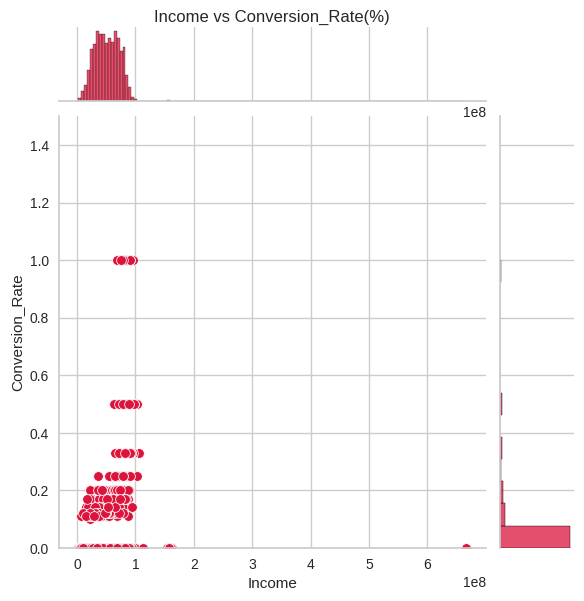

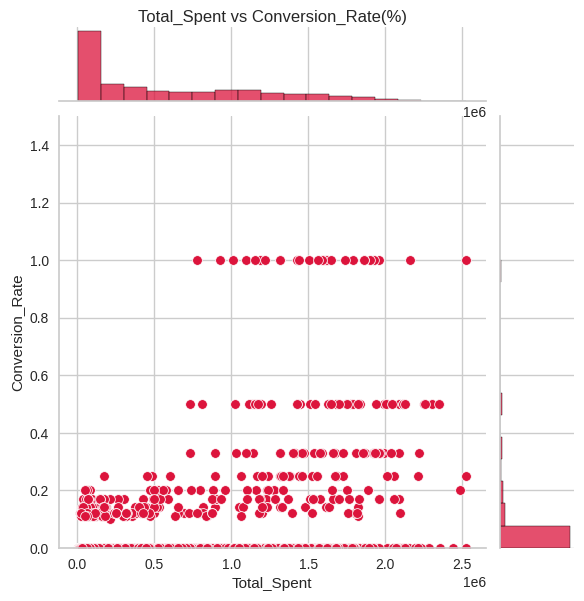

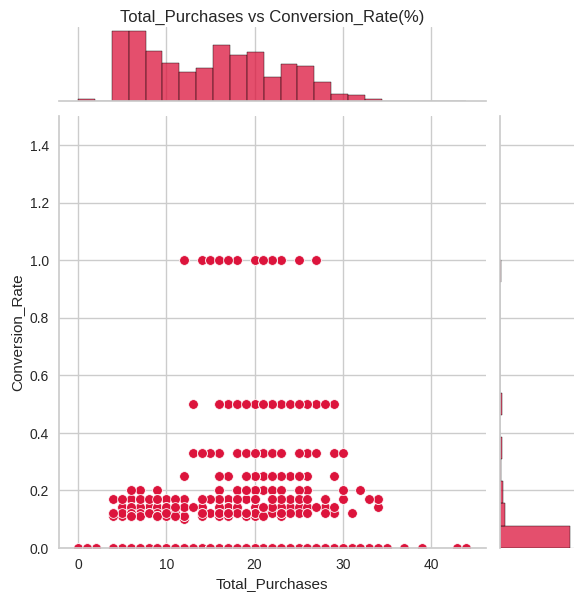

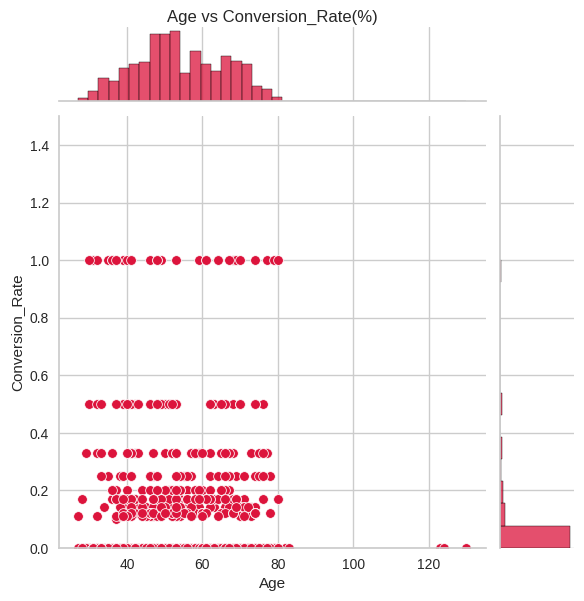

In [ ]:
#Conversion_Rate vs Income, Total_Spent, Total_Purchases, Age
def plot_jointplot(x, y, data):
    sns.jointplot(x=x, y=y, data=data, color='crimson')
    plt.title(f'{x} vs {y}(%)',y=1.2, fontsize=12)
    plt.ylim(0, 1.5)
    plt.show()

plot_jointplot('Income', 'Conversion_Rate', df)
plot_jointplot('Total_Spent', 'Conversion_Rate', df)
plot_jointplot('Total_Purchases', 'Conversion_Rate', df)
plot_jointplot('Age', 'Conversion_Rate', df)

- The higher the Income, the greater the ability to purchase products, leading to an increase in Total_Spent, Total_Purchasing, and Conversion_Rate.
- The distribution between Age and Income resembles a normal distribution, having no strong effect. As a result, Age does not significantly affect Conversion_Rate.

## Data Cleaning & Preprocessing

In [ ]:
df1 = df.copy()

In [ ]:
missing=df1.isnull().sum().sort_values(ascending=False)
percen_missing=round(df1.isnull().sum().sort_values(ascending = False)/len(df1)*100,3).sort_values(ascending=False)
missing_value = pd.concat([missing,percen_missing], axis=1, keys=['Isnull','Percent'])
missing_value

,Isnull,Percent
Income,24,1.071
Unnamed: 0,0,0.000
Z_CostContact,0,0.000
AcceptedCmp3,0,0.000
AcceptedCmp4,0,0.000
AcceptedCmp5,0,0.000
AcceptedCmp1,0,0.000
AcceptedCmp2,0,0.000
Complain,0,0.000
Z_Revenue,0,0.000


In [ ]:
df1.duplicated().sum()

0

- There are missing values in Income (1.071%). It has been decided to drop them because they do not significantly affect the results.
- There is no duplicated data.
- Drop some unnecessary features.
- Perform feature encoding on the features Education, Marital_Status, and Age_Category.

In [ ]:
#Handling Missing Value & Drop Some Features
df1=df1.dropna()
df1=df1.drop(columns=['Unnamed: 0', 'ID','Year_Birth','Dt_Customer',
                      'MntCoke', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                      'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                      'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response'],axis=1)

In [ ]:
print('Education:', df1['Education'].unique())
print('Marital Status:', df1['Marital_Status'].unique())
print('Age category:', df1['Age_category'].unique())

Education: ['S1' 'S3' 'S2' 'SMA' 'D3']
Marital Status: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
Age category: ['Senior Adult' 'Middle-Aged Adult' 'Adult']


In [ ]:
#Feature Encoding
def custom_label_encoding(df1):
    education = {'SMA': 0, 'D3': 1, 'S1': 2, 'S2': 3, 'S3': 4}
    marital_status = {'Lajang': 0, 'Duda': 0, 'Janda': 0, 'Cerai': 0, 'Bertunangan': 1, 'Menikah': 1}
    age_category = {'Adult': 0, 'Middle-Aged Adult': 1, 'Senior Adult': 2}

    df1['Education'] = df1['Education'].map(education)
    df1['Marital_Status'] = df1['Marital_Status'].map(marital_status)
    df1['Age_category'] = df1['Age_category'].map(age_category)

    return df1
df_le = custom_label_encoding(df1)
df_le

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Age,Total_Spent,Total_Purchases,Total_Cmpresponses,Conversion_Rate,Age_category
0,2,0,58138000.0,0,0,58,7,0,66,1617000,25,0,0.14,2
1,2,0,46344000.0,1,1,38,5,0,69,27000,6,0,0.00,2
2,2,1,71613000.0,0,0,26,4,0,58,776000,21,0,0.00,1
3,2,1,26646000.0,1,0,26,6,0,39,53000,8,0,0.00,0
4,4,1,58293000.0,1,0,94,5,0,42,422000,19,0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223000.0,0,1,46,5,0,56,1341000,18,0,0.00,1
2236,4,1,64014000.0,2,1,56,7,0,77,444000,22,1,0.00,2
2237,2,0,56981000.0,0,0,91,6,0,42,1241000,19,1,0.00,1
2238,3,1,69245000.0,0,1,8,3,0,67,843000,23,0,0.00,2


In [ ]:
#Outliers using IQR
for i in df_le.columns:
    if df_le[i].dtypes in [np.int64, np.float64]:
        print(i, ':', df_le[i].dtypes)

        Q1 = df_le[i].quantile(0.25)
        print('Q1 =', Q1)

        Q3 = df_le[i].quantile(0.75)
        print('Q3 =', Q3)

        IQR = Q3 - Q1
        print('IQR =', IQR)

        nilai_min = df_le[i].min()
        print('nilai min =', nilai_min)
        min_IQR = Q1 - 1.5 * IQR
        print('Lower Bound =', min_IQR)

        nilai_max = df_le[i].max()
        print('nilai max =', nilai_max)
        max_IQR = Q3 + 1.5 * IQR
        print('Upper Bound =', max_IQR)


        if nilai_min < min_IQR:
            print('Low outlier is found <', min_IQR)
            print('Low outlier Index:', list(df_le[df_le[i] < min_IQR].index))
        if nilai_max > max_IQR:
            print('High outlier is found >', max_IQR)
            print('High outlier Index:', list(df_le[df_le[i] > max_IQR].index))

        print('\n')

Education : int64
Q1 = 2.0
Q3 = 3.0
IQR = 1.0
nilai min = 0
Lower Bound = 0.5
nilai max = 4
Upper Bound = 4.5
Low outlier is found < 0.5
Low outlier Index: [11, 105, 136, 184, 190, 280, 344, 502, 608, 612, 663, 667, 693, 738, 785, 893, 933, 944, 1027, 1118, 1128, 1170, 1174, 1183, 1220, 1240, 1246, 1284, 1324, 1344, 1361, 1416, 1592, 1643, 1677, 1704, 1714, 1727, 1746, 1755, 1768, 1780, 1896, 2013, 2077, 2091, 2104, 2105, 2133, 2164, 2183, 2189, 2200, 2208]


Marital_Status : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
Lower Bound = -1.5
nilai max = 1
Upper Bound = 2.5


Income : float64
Q1 = 35303000.0
Q3 = 68522000.0
IQR = 33219000.0
nilai min = 1730000.0
Lower Bound = -14525500.0
nilai max = 666666000.0
Upper Bound = 118350500.0
High outlier is found > 118350500.0
High outlier Index: [164, 617, 655, 687, 1300, 1653, 2132, 2233]


Kidhome : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
Lower Bound = -1.5
nilai max = 2
Upper Bound = 2.5


Teenhome : int64
Q1 = 0.0
Q3 = 1.0
IQR =

In [ ]:
#Handling outliers data
print(f'Number of rows before filtering outliers: {len(df_le)}')
nums=df_le.select_dtypes(include=['int64','float64']).columns.tolist()
filter = np.array([True] * len(df_le))
for col in nums:
    Q1 = df_le[col].quantile(0.25)
    Q3 = df_le[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter = ((df_le[col] >= low_limit) & (df_le[col] <= high_limit)) & filter

df_le = df_le[filter].reset_index()
print('Number of rows after filtering outliers', len(df_le))

Number of rows before filtering outliers: 2216
Number of rows after filtering outliers 1529


Data selection is using the RFM model as follows:
- R (RECENCY): Time elapsed since the customer's last purchase (Recency).
- F (FREQUENCY): Total number of orders (Total_Purchases).
- M (MONETARY VALUE): Total order value for buying products (Total_Spent).

In [ ]:
#Standardisasi & Rename columns
df3 = df_le [['Recency','Total_Purchases','Total_Spent']].copy()

df3.columns = ['Recency','Frequency','Monetary']
features = ['Recency','Frequency','Monetary']
X = df3[features].values

X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std, columns=features)
df_std.head()

,Recency,Frequency,Monetary
0,-0.448552,-1.053570,-0.899466
1,-0.867000,0.941445,0.610176
2,-0.867000,-0.787568,-0.847062
3,1.504206,0.675443,-0.103327
4,-1.215707,1.074446,0.489243


##Modeling Data

###Elbow Method K-Means Clustering

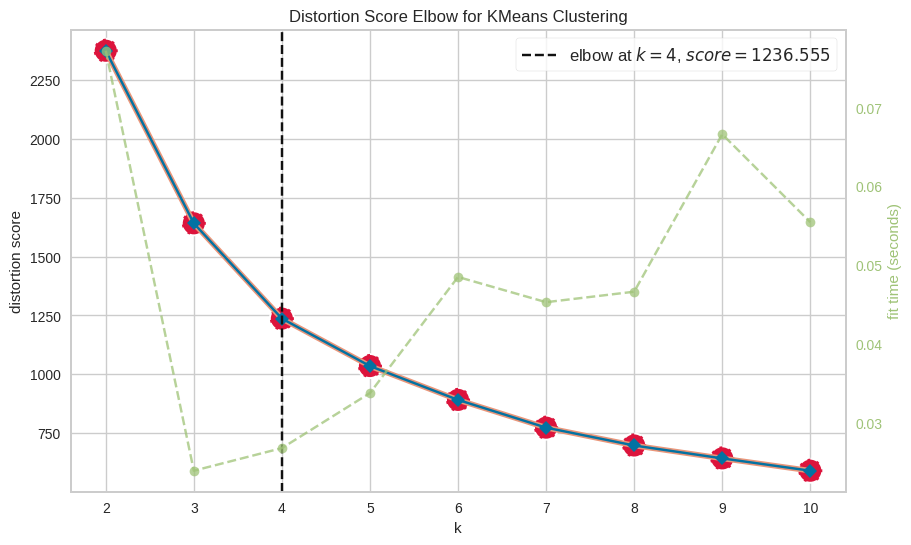

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
inertia = []
K = range(2, 11)
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=142)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=K, y=inertia, color='darksalmon', linewidth=4)
sns.scatterplot(x=K, y=inertia, s=300, color='crimson', linestyle='--')

# Use KElbowVisualizer for interactive visualization
model = KMeans(random_state=142)
visualizer = KElbowVisualizer(model, k=(2, 11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std)
visualizer.show()

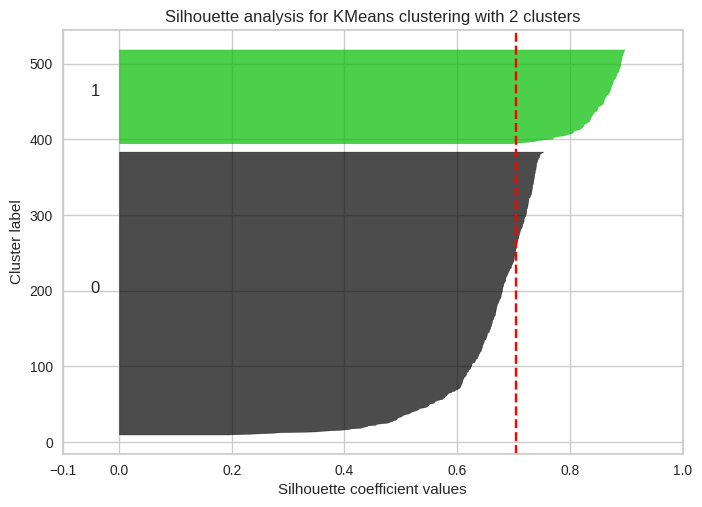

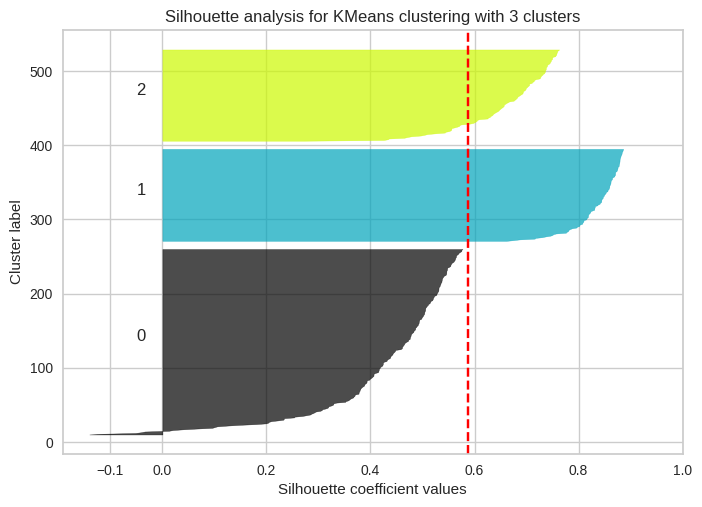

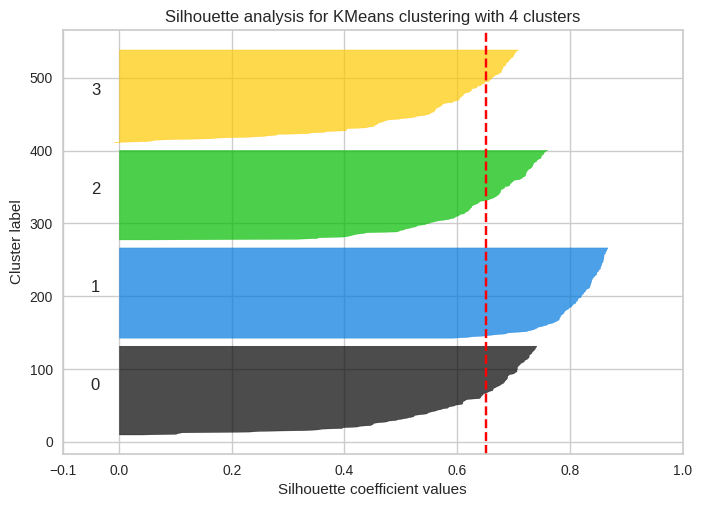

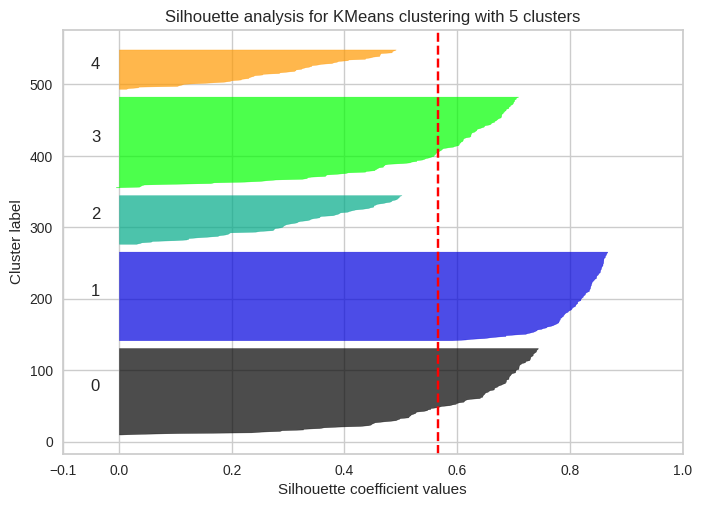

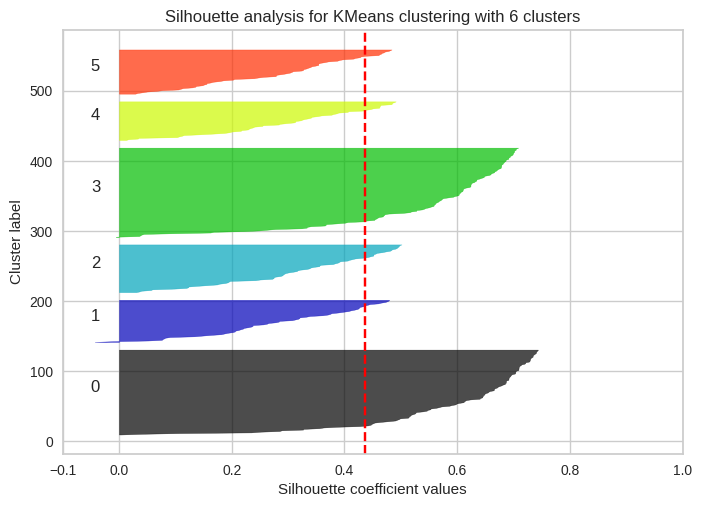

   n_clusters  silhouette_score
0           2          0.704979
1           3          0.588200
2           4          0.650519
3           5          0.566234
4           6          0.435830


In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(data, range_n_clusters):
    results = []

    for n_clusters in range_n_clusters:
        cluster_labels = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10).fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([n_clusters, silhouette_avg])

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = silhouette_samples(data, cluster_labels)[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        plt.title("Silhouette analysis for KMeans clustering with {} clusters".format(n_clusters))
        plt.xlabel("Silhouette coefficient values")
        plt.ylabel("Cluster label")
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()

    return pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])

# Generate sample data
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

# Define range of clusters
range_n_clusters = [2, 3, 4, 5, 6]

# Visualize silhouette analysis
results_df = visualize_silhouette(X, range_n_clusters)
print(results_df)

Based on the comparison graph between inertia and k with the distortion parameter, the optimal value is 4. Similarly, the Silhouette analysis for KMeans clustering indicates indecision between clusters 2 and 4. By aligning with the graph between inertia and k with the distortion parameter, cluster 4 is chosen with a silhouette score of 0.650519.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_std.values)
df_std['cluster'] = kmeans.labels_
df_std.sample(5)

,Recency,Frequency,Monetary,cluster
632,-1.355190,1.872452,1.517170,0
628,-0.553164,-0.255564,-0.587057,1
543,1.364723,-0.255564,-0.466124,3
83,-0.309070,1.207447,0.319937,0
1259,1.608818,0.143439,-0.171855,3


In [ ]:
#PCA visualisation
pca = PCA(n_components=2).fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']
df_pca.sample(5)

,PC 1,PC 2,cluster
662,0.523893,1.606117,2
570,-0.151457,1.312837,2
280,-1.861076,-0.487564,3
840,-2.088254,0.574005,3
317,2.742197,0.232985,0


<Axes: xlabel='PC 1', ylabel='PC 2'>

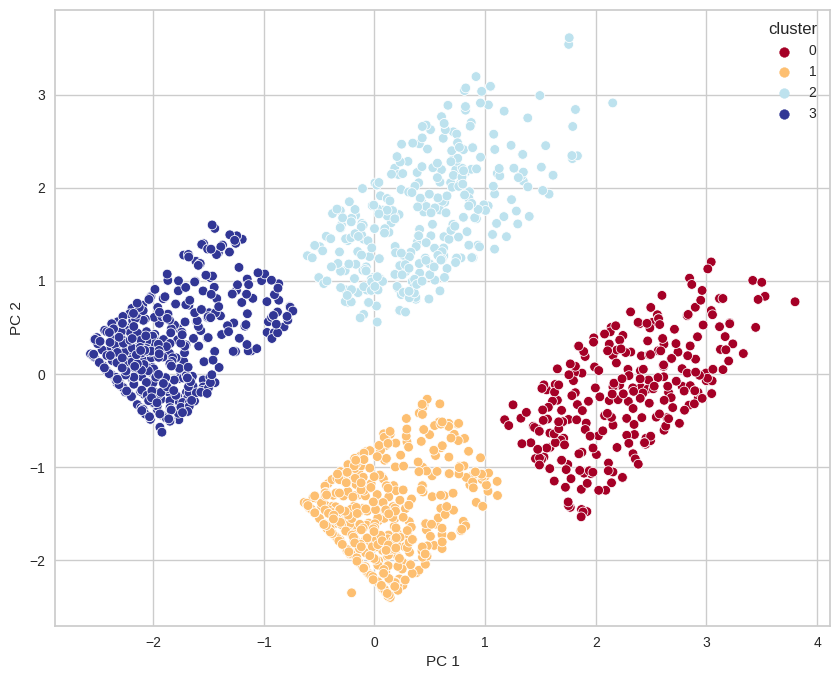

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="cluster", palette='RdYlBu')

###Interpreting

In [ ]:
df3['cluster'] = kmeans.labels_
df_stat = display(df3.groupby('cluster').agg(['mean','median','min','max']))

Recency                 Frequency                     Monetary  \
              mean median min max       mean median min max          mean   
cluster                                                                     
0        23.025271   23.0   0  52  21.487365   21.0  11  32  8.830939e+05   
1        26.354120   26.0   0  52   8.269488    8.0   1  17  1.135033e+05   
2        71.514368   71.0  42  99  21.672414   21.0  11  39  1.057891e+06   
3        76.202198   77.0  50  99   8.964835    8.0   4  19  1.316396e+05   

                                     
            median     min      max  
cluster                              
0         841000.0  277000  2092000  
1          66000.0    8000   711000  
2        1020500.0  401000  2440000  
3          75000.0    8000   801000

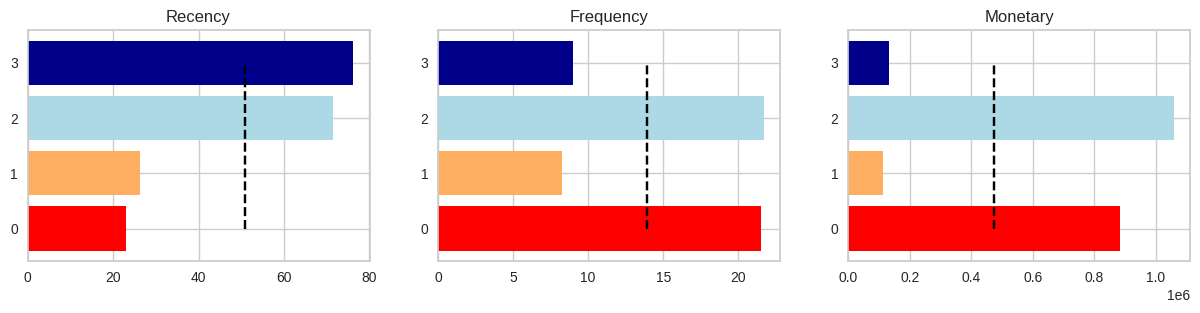

In [ ]:
#Observing the average variables between clusters.
c = ["#FF0000","#fdae61","#add8e6","#00008B"]

plt.figure(figsize=[len(features)*5,3])
i = 1
for col in features:
  ax = plt.subplot(1,len(features),i)
  ax.vlines(df3[col].mean(), ymin=0, ymax=3, color='black', linestyle='--')
  g = df3.groupby('cluster')
  x = g[col].mean().index
  y = g[col].mean().values
  ax.barh(x,y, color = c)
  plt.title(col)
  i = i+1

**Interpreting**
1. **Cluster 0**:
* Recency: On average, customers in this cluster recently interacted with the business within the last 23 days.
* Frequency: Customers in this cluster shop approximately 21 times.
* Monetary: Customers in this cluster spend around 883,090 units of the local currency.
***Interpretation**: Customers in Cluster 0 are relatively new but already show high shopping frequency and significant spending.
2. **Cluster 1**:
* Recency: On average, customers in this cluster recently interacted with the business within the last 26 days.
* Frequency: Customers in this cluster shop around 8 times.
* Monetary: Customers in this cluster spend around 113,503 units of the local currency.
***Interpretation**: Customers in Cluster 3 are relatively new customers with low shopping frequency and relatively low spending.
3. **Cluster 2**:
* Recency: On average, customers in this cluster last interacted with the business 71 days ago.
* Frequency:Customers in this cluster shop around 21 times.
* Monetary: Customers in this cluster spend approximately 1,057,891 units of the local currency.
***Interpretation**:Customers in Cluster 2 are long-term, high-frequency shoppers with the highest spending.
4. **Cluster 3**:
* Recency: On average, customers in this cluster last interacted with the business 76 days ago.
* Frequency: Customers in this cluster shop around 9 times.
* Monetary: Customers in this cluster spend approximately 131,639 units of the local currency.
***Interpretation**: Customers in Cluster 1 are long-term customers but with low shopping frequency and relatively low spending compared to other clusters
---
**Cluster for Marketing Retargeting**:

**Cluster 0 & Cluster 2**: This clusters are good targets for retargeting due to their high shopping frequency and high spending. Marketing strategies can focus on offering exclusive deals or purchase bonuses to increase customer loyalty within these clusters.

###Potential Impact

In [ ]:
Cluster_0 = df3[df3['cluster'] == 0]['Monetary'].sum()
Cluster_1 = df3[df3['cluster'] == 1]['Monetary'].sum()
Cluster_2 = df3[df3['cluster'] == 2]['Monetary'].sum()
Cluster_3 = df3[df3['cluster'] == 3]['Monetary'].sum()
total_spent  = Cluster_0 + Cluster_1 + Cluster_2 + Cluster_3
potential_impact_cluster_0 = (Cluster_0 / total_spent) * 100
potential_impact_cluster_2 = (Cluster_2 / total_spent) * 100


print('Total Spent of Cluster 0: Rp', Cluster_0)
print('Total Spent of Cluster 1: Rp', Cluster_1)
print('Total Spent of Cluster 2: Rp', Cluster_2)
print('Total Spent of Cluster 3: Rp', Cluster_3)
print('Total Spent: Rp', total_spent)
print('Potential Impact of Cluster 0: {:.2f}%'.format(potential_impact_cluster_0))
print('Potential Impact of Cluster 2: {:.2f}%'.format(potential_impact_cluster_2))

Total Spent of Cluster 0: Rp 244617000
Total Spent of Cluster 1: Rp 50963000
Total Spent of Cluster 2: Rp 368146000
Total Spent of Cluster 3: Rp 59896000
Total Spent: Rp 723622000
Potential Impact of Cluster 0: 33.80%
Potential Impact of Cluster 2: 50.88%


If we calculate the potential impact by focusing on retargeting marketing in Cluster 0 and Cluster 2, the total spending we will receive is Rp 244617000 for Cluster 0 and Rp 368146000 for Cluster 2, with a potential impact of 33.80% and 50.88%.